# **Data Cleaning**

Data cleaning (or data cleansing) is the process of identifying, correcting, or removing errors, inconsistencies, and inaccuracies from a dataset. It ensures that the data is complete, reliable, and ready for analysis.

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Load the dataset
file_path = '/content/AB_NYC_2019.csv.zip'
df = pd.read_csv(file_path)

1.**Understanding the Dataset**

In [ ]:
print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review   

In [ ]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1        

2.**Handling Missing Data**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


**Visualizing Missing Data**

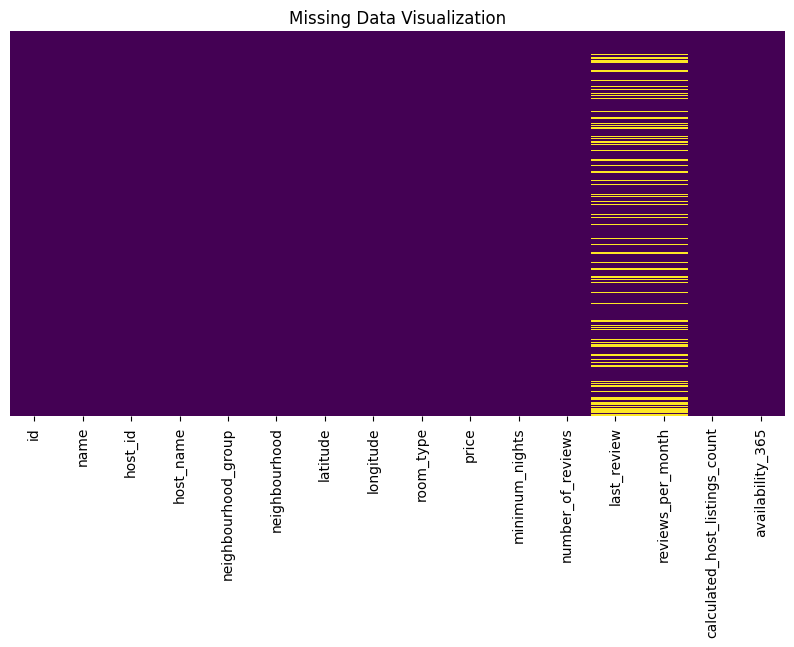

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Visualization")
plt.show()

**Filling missing values**

In [ ]:
# Example: Filling missing 'reviews_per_month' with 0

df['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-9-e96ed618a8cd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [ ]:
# Dropping rows with missing values in 'name' and 'host_name'
df.dropna(subset=['name', 'host_name'], inplace=True)


3.**Removing Duplicates**

In [ ]:
print("\nDuplicate Entries Before Removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate Entries After Removal:", df.duplicated().sum())



Duplicate Entries Before Removal: 0
Duplicate Entries After Removal: 0


4.**Standardization & Consistency**

In [ ]:
# Convert 'neighbourhood_group' and 'neighbourhood' to title case
df['neighbourhood_group'] = df['neighbourhood_group'].str.title()
df['neighbourhood'] = df['neighbourhood'].str.title()


5.**Handling Outliers**

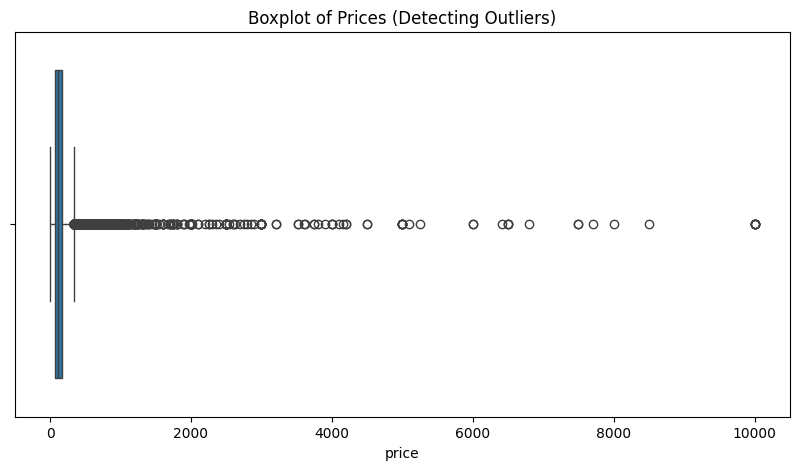

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Prices (Detecting Outliers)")
plt.show()

In [ ]:
# Removing outliers in 'price' column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


6.**Verifying Data Integrity**

In [ ]:
print("\nFinal Dataset Overview:")
print(df.info())
print("\nFinal Dataset Summary:")
print(df.describe())


Final Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 45887 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45887 non-null  int64  
 1   name                            45887 non-null  object 
 2   host_id                         45887 non-null  int64  
 3   host_name                       45887 non-null  object 
 4   neighbourhood_group             45887 non-null  object 
 5   neighbourhood                   45887 non-null  object 
 6   latitude                        45887 non-null  float64
 7   longitude                       45887 non-null  float64
 8   room_type                       45887 non-null  object 
 9   price                           45887 non-null  int64  
 10  minimum_nights                  45887 non-null  int64  
 11  number_of_reviews               45887 non-null  int64  
 12  last_review 

7.**Save the Cleaned Dataset**

In [ ]:
# Create the directory if it doesn't exist
os.makedirs('/mnt/data', exist_ok=True)

# Now save the cleaned dataset
df.to_csv('/mnt/data/cleaned_AB_NYC_2019.csv', index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [ ]:
# Final Conclusion
print("\nConclusion:")
print("The data cleaning process successfully handled missing values, removed duplicates, standardized data formats, and addressed outliers. The cleaned dataset is now more accurate and reliable for further analysis and visualization.")



Conclusion:
The data cleaning process successfully handled missing values, removed duplicates, standardized data formats, and addressed outliers. The cleaned dataset is now more accurate and reliable for further analysis and visualization.


**Conclusion:**

The data cleaning process successfully addressed missing values, duplicates, inconsistencies, and outliers, making the dataset more accurate, reliable, and ready for analysis. This cleaned dataset can now be confidently used for exploratory data analysis (EDA), visualization, and machine learning models.